In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from jacobian import calc_jac
from linearize import eval_linearized_f

from scipy.integrate import odeint

%load_ext autoreload
%autoreload 2


def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

In [ ]:
def f(x,p):
    return x**p['k']



In [2]:
L_list = np.linspace(0,0.02, 40)


# state and E to linearize around
S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

p0 = {"L_list" : L_list, #discretization bins
     'E' :  1e3, #evaporation rate
     'V' : 1e-6, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e3, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True #toggle breakage for debug
     }



x0 = np.hstack([S0, V0, n0])


#state and E to eval at 

S = 1 #initial supersaturation
V = 1 #initial volume
n = np.zeros_like(L_list) #initial population density distribution

p = {"L_list" : L_list, #discretization bins
     'E' :  1.2*1e3, #evaporation rate
     'V' : 1e-6, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e3, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True #toggle breakage for debug
     }




x = np.hstack([S0, V0, n0])


dxdt, dfdp = eval_linearized_f(x,p,x0,p0)

### compare time integrated solution with linearized version and original verision


In [3]:
tlist = np.linspace(0,10e-6,50) 

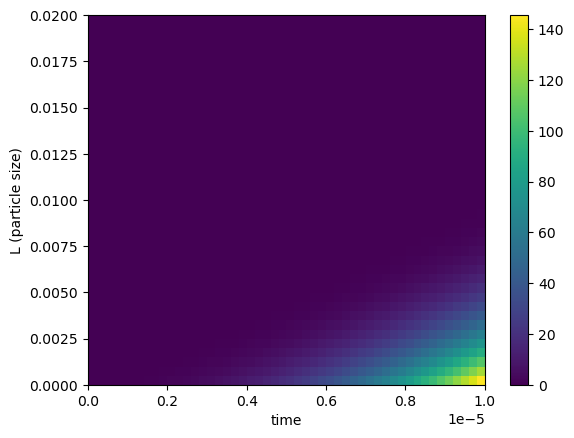

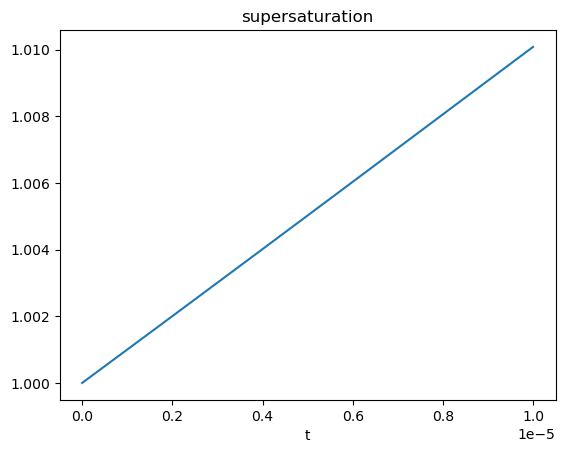

Text(0.5, 0, 't')

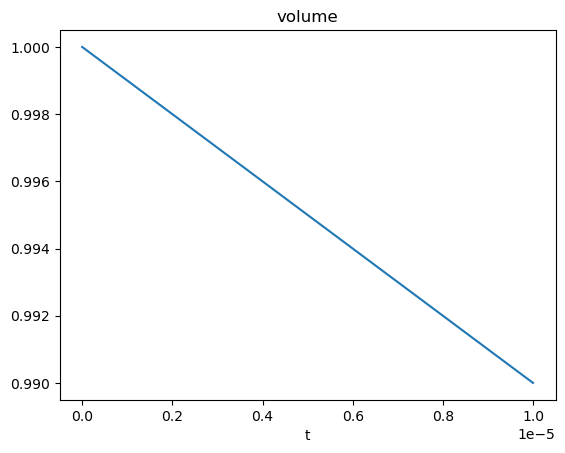

In [4]:
#evalf, unperturbed parameters
x_t_x0p0 = odeint(evalf, y0=x0, t=tlist, args=(p0,None))

#plot results
n_t_x0p0 = x_t_x0p0[:,2:]
better_imshow(L_list, tlist, n_t_x0p0.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t_x0p0[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t_x0p0[:,1]) 
plt.title('volume')
plt.xlabel('t')



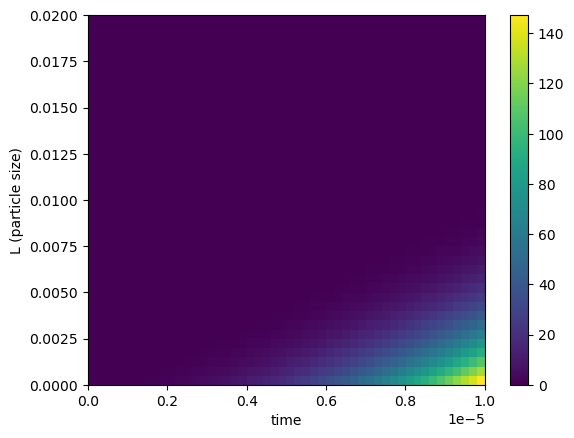

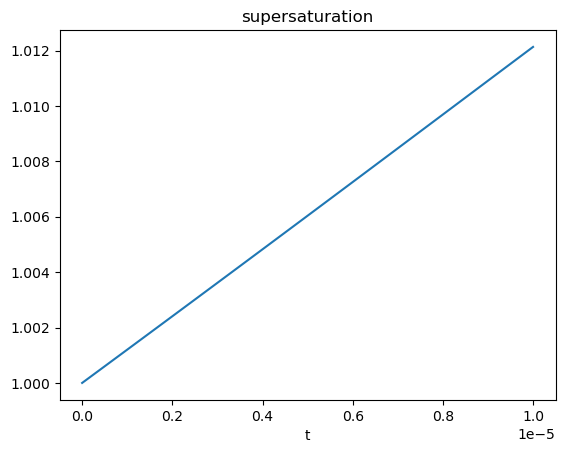

Text(0.5, 0, 't')

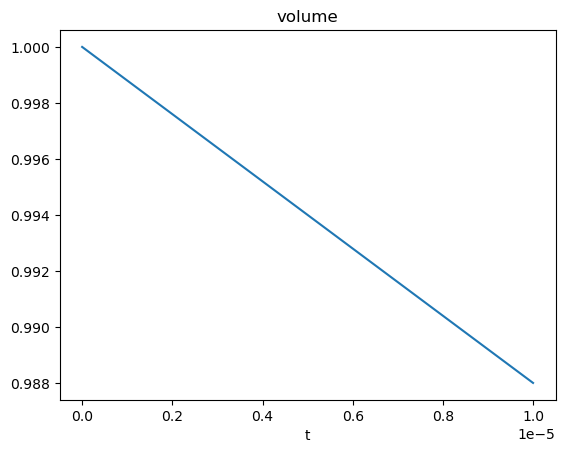

In [5]:
#evalf, perturbed x and p
x_t_xp = odeint(evalf, y0=x, t=tlist, args=(p,None))

#plot results
n_t_xp = x_t_xp[:,2:]
better_imshow(L_list, tlist, n_t_xp.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t_xp[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t_xp[:,1]) 
plt.title('volume')
plt.xlabel('t')

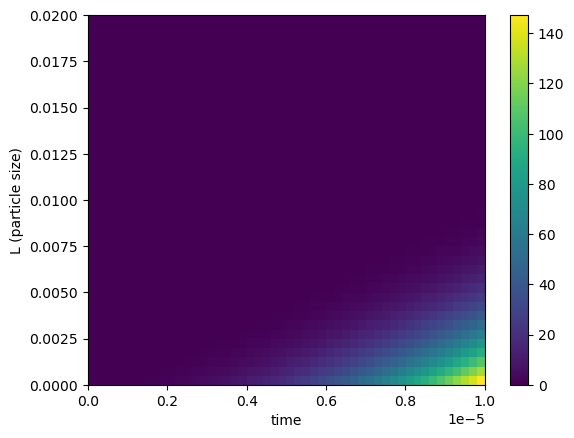

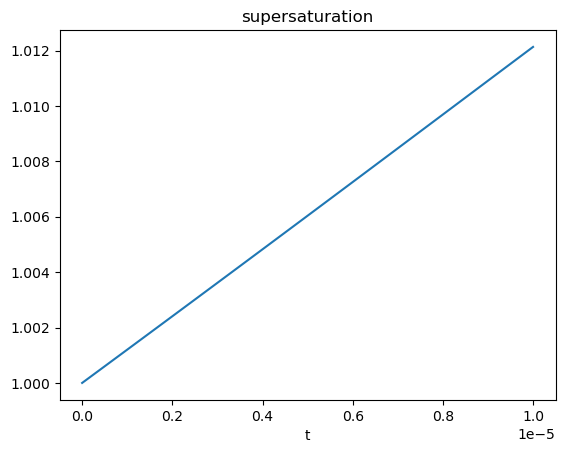

Text(0.5, 0, 't')

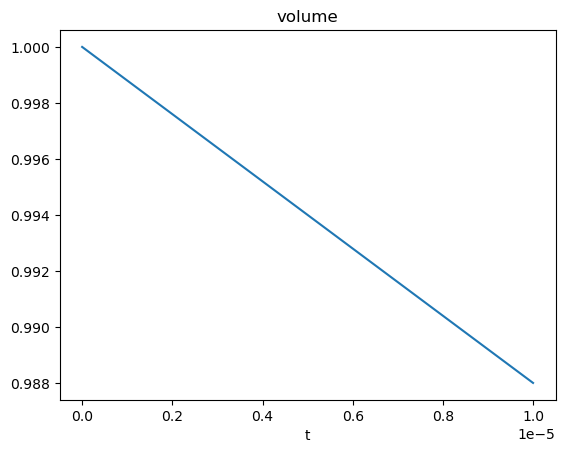

In [14]:
# now "linearize" around (x,p)
# should be exactly the same as evalf

def linear_evalf(x, t, p):
     dxdt, dfdp = eval_linearized_f(x,p,x,p)

     return dxdt
x_t_linearized_xp = odeint(linear_evalf, y0=x, t=tlist, args=(p,))




#plot results
n_t_linearized_xp = x_t_linearized_xp[:,2:]
better_imshow(L_list, tlist, n_t_linearized_xp.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t_linearized_xp[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t_linearized_xp[:,1]) 
plt.title('volume')
plt.xlabel('t')



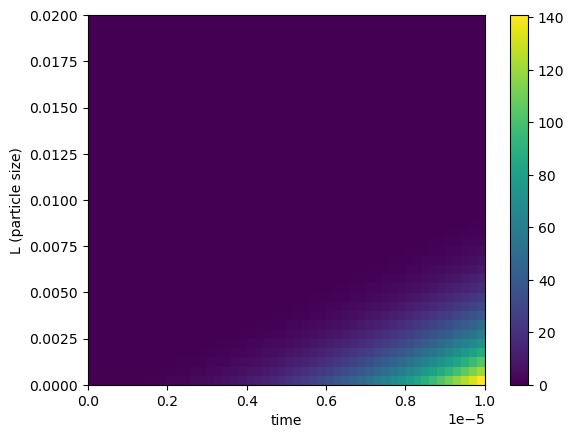

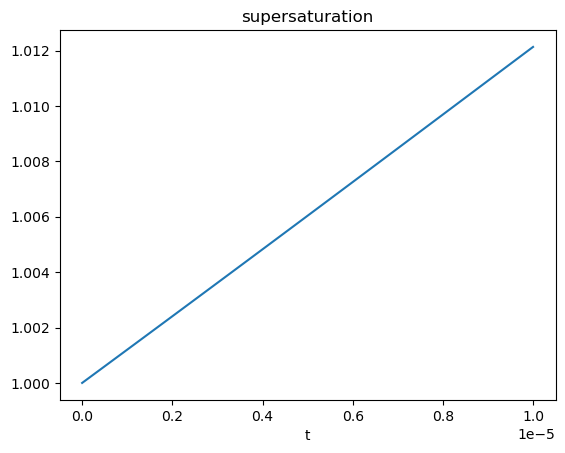

Text(0.5, 0, 't')

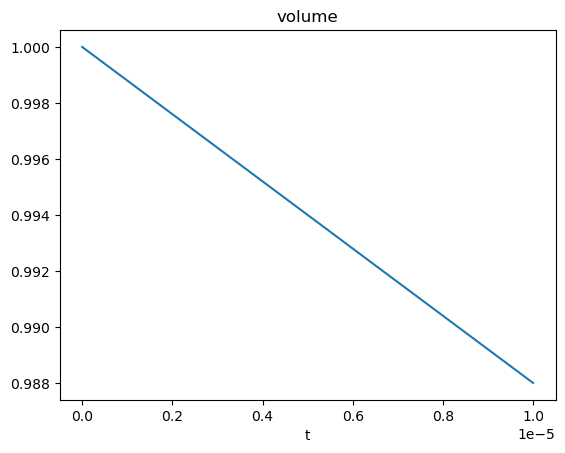

In [7]:
# now linearize around (x0,p)
# error(t) grows bc nonlinear

def linear_evalf(x, t, p):
     dxdt, dfdp = eval_linearized_f(x,p,x0,p)

     return dxdt
x_t_linearized_x0p = odeint(linear_evalf, y0=x, t=tlist, args=(p,))




#plot results
n_t_linearized_x0p = x_t_linearized_x0p[:,2:]
better_imshow(L_list, tlist, n_t_linearized_x0p.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t_linearized_x0p[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t_linearized_x0p[:,1]) 
plt.title('volume')
plt.xlabel('t')



In [8]:
#now linearize around (x, p0)
#(so only the parameters)
#this one just never finishes? but linearizing around both x0,p0 works so not sure why

def linear_evalf(x, t, p):
     dxdt, dfdp = eval_linearized_f(x,p,x,p0)
     return dxdt
x_t_linearized_xp0 = odeint(linear_evalf, y0=x, t=tlist, args=(p,))



#plot results
n_t_linearized_xp0 = x_t_linearized_xp0[:,2:]
better_imshow(L_list, tlist, n_t_linearized_xp0.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t_linearized_xp0[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t_linearized_xp0[:,1]) 
plt.title('volume')
plt.xlabel('t')

KeyboardInterrupt: 

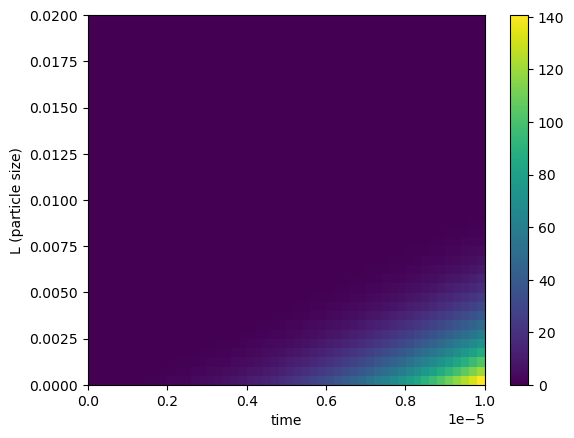

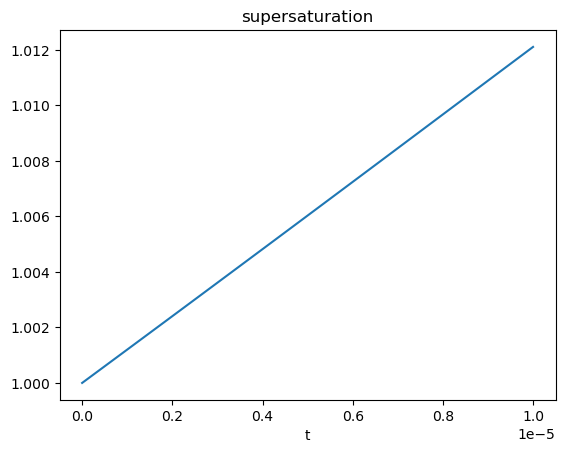

Text(0.5, 0, 't')

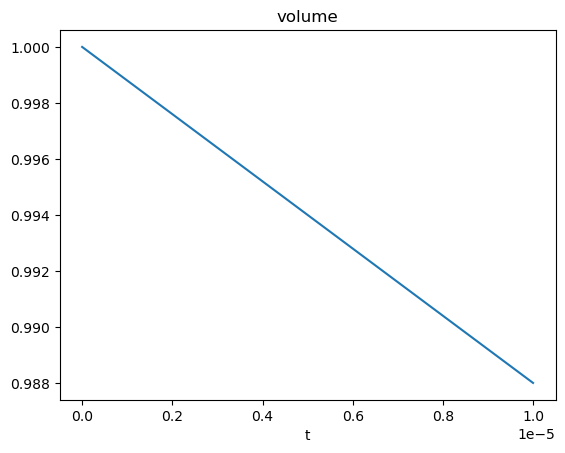

In [9]:
#now linearize around both (x0, p0)


def linear_evalf(x, t, p):
     dxdt, dfdp = eval_linearized_f(x,p,x0,p0)
     return dxdt
x_t_linearized_x0p0 = odeint(linear_evalf, y0=x, t=tlist, args=(p,))

#plot results
n_t_linearized_x0p0 = x_t_linearized_x0p0[:,2:]
better_imshow(L_list, tlist, n_t_linearized_x0p0.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t_linearized_x0p0[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t_linearized_x0p0[:,1]) 
plt.title('volume')
plt.xlabel('t')

### Error comparisons

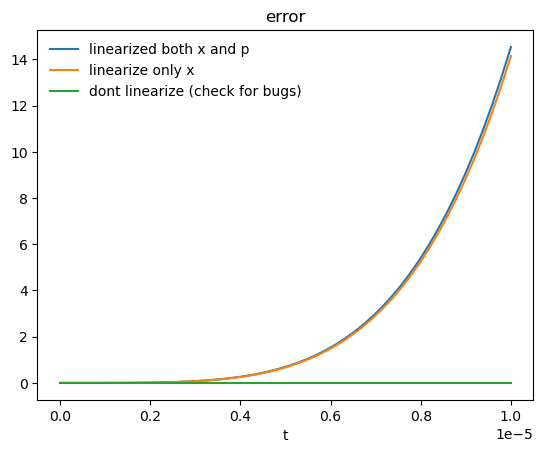

In [15]:
#compare error vs time

plt.title('error')
plt.plot(tlist, np.linalg.norm(n_t_linearized_x0p0 - n_t_xp, axis=1), label = 'linearized both x and p')
plt.plot(tlist, np.linalg.norm(n_t_linearized_x0p - n_t_xp, axis=1), label = 'linearize only x')
plt.plot(tlist, np.linalg.norm(n_t_linearized_xp - n_t_xp, axis=1), label = 'dont linearize (check for bugs)')

plt.xlabel('t')
plt.legend(frameon=False)
plt.show()

In [ ]:
#could also look at dfdp for different parameters, get a sense of of sensistivity